# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [9]:
import numpy as np
import matplotlib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### Now take a look at the shapes of the X and y matricies 

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [7]:
import matplotlib.pyplot as plt

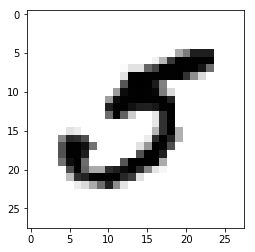

In [10]:
plt.imshow(np.reshape(X[36000],(28,28)), cmap = matplotlib.cm.binary, interpolation = "nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [11]:
print(np.reshape(X[36000],(28,28)))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  86 131 225 225 225   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  73
  197 253 252 252 252 252   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4  29  29 154 187 252
  252 253 252 252 233 145   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  29 252 253 25

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [32]:
X_train = X[:60000]
X_test = X[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [28]:
from collections import Counter
print(Counter(y))
y_target = y
y_target = np.array(list(map(lambda x: 1 if x == 5.0 else 0,y_target)))

Counter({1.0: 7877, 7.0: 7293, 3.0: 7141, 2.0: 6990, 9.0: 6958, 0.0: 6903, 6.0: 6876, 8.0: 6825, 4.0: 6824, 5.0: 6313})


In [29]:
Counter(y_target) # We saw that we have 6313 ones so it is done well

Counter({0: 63687, 1: 6313})

In [34]:
y_train = y_target[:60000]
y_test = y_target[60000:]

In [35]:
len(X_train),len(y_train),len(X_test),len(y_test)

(60000, 60000, 10000, 10000)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [48]:
y_pred = model.predict(X)

In [49]:
y_pred[36000]

1

In [ ]:
# Yes it predicted well. 1 is true and we wanted to get the 5s only.

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [41]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [42]:
n5class = Never5Classifier()

In [43]:
n5class.fit(X_train, y_train)

In [47]:
y_pred2 = n5class.predict(X)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[6843   60    0    0    0    0    0    0    0    0]
 [7860   17    0    0    0    0    0    0    0    0]
 [6979   11    0    0    0    0    0    0    0    0]
 [6990  151    0    0    0    0    0    0    0    0]
 [6818    6    0    0    0    0    0    0    0    0]
 [1020 5293    0    0    0    0    0    0    0    0]
 [6770  106    0    0    0    0    0    0    0    0]
 [7281   12    0    0    0    0    0    0    0    0]
 [6710  115    0    0    0    0    0    0    0    0]
 [6931   27    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.11      0.99      0.19      6903
         1.0       0.00      0.00      0.00      7877
         2.0       0.00      0.00      0.00      6990
         3.0       0.00      0.00      0.00      7141
         4.0       0.00      0.00      0.00      6824
         5.0       0.00      0.00      0.00      6313
         6.0       0.00      0.00      0.00      6876
         7.0       0.00      0.00   

In [56]:
print(confusion_matrix(y, y_pred2))
print(classification_report(y, y_pred2))

[[6903    0    0    0    0    0    0    0    0    0]
 [7877    0    0    0    0    0    0    0    0    0]
 [6990    0    0    0    0    0    0    0    0    0]
 [7141    0    0    0    0    0    0    0    0    0]
 [6824    0    0    0    0    0    0    0    0    0]
 [6313    0    0    0    0    0    0    0    0    0]
 [6876    0    0    0    0    0    0    0    0    0]
 [7293    0    0    0    0    0    0    0    0    0]
 [6825    0    0    0    0    0    0    0    0    0]
 [6958    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.10      1.00      0.18      6903
         1.0       0.00      0.00      0.00      7877
         2.0       0.00      0.00      0.00      6990
         3.0       0.00      0.00      0.00      7141
         4.0       0.00      0.00      0.00      6824
         5.0       0.00      0.00      0.00      6313
         6.0       0.00      0.00      0.00      6876
         7.0       0.00      0.00   

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?